In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mtdlearn.mtd import MTD
from mtdlearn.preprocessing import PathEncoder
from mtdlearn.datasets import ChainGenerator

import warnings
warnings.filterwarnings("ignore")

## Generate data

In [4]:
cg = ChainGenerator(('A', 'B', 'C'), 3, min_len=4, max_len=5)

In [5]:
x, y = cg.generate_data(1000)

In [6]:
x[:5]

array([['A>B>B>C'],
       ['B>B>C>C'],
       ['A>C>B>A'],
       ['C>B>A>B'],
       ['A>C>A>A']], dtype='<U9')

In [7]:
y[:5]

array(['C', 'C', 'C', 'C', 'B'], dtype='<U1')

## Encode paths

In [8]:
pe = PathEncoder(3)
pe.fit(x, y)

PathEncoder(input_vector=False, order=3, r_just_string='null',
            return_vector=False, sep='>')

In [9]:
pe.label_dict

{'A': 0, 'B': 1, 'C': 2, 'null': 3}

In [10]:
x_tr3, y_tr3 = pe.transform(x, y)

In [11]:
x_tr3[:5]

array([[1, 1, 2],
       [1, 2, 2],
       [2, 1, 0],
       [1, 0, 1],
       [2, 0, 0]])

In [12]:
y_tr3[:5]

array([2, 2, 2, 2, 1])

## Fitting model

In [13]:
model = MTD(order=3)

In [14]:
model.fit(x_tr3, y_tr3)

log-likelihood value: -990.6104938352795


## Information criteria

In [15]:
model.aic

2009.220987670559

In [16]:
model.bic

2077.929561576309

## Trained parameters

In [17]:
model.lambdas.round(3)

array([0.208, 0.382, 0.411])

In [18]:
model.transition_matrices.round(3)

array([[[0.202, 0.454, 0.344],
        [0.108, 0.001, 0.892],
        [0.549, 0.39 , 0.061]],

       [[0.382, 0.115, 0.503],
        [0.354, 0.431, 0.215],
        [0.139, 0.031, 0.83 ]],

       [[0.073, 0.552, 0.375],
        [0.21 , 0.405, 0.386],
        [0.136, 0.309, 0.555]]])

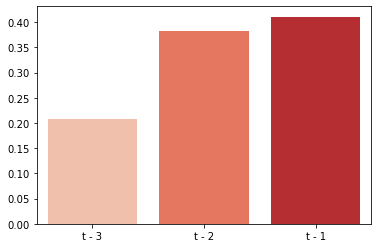

In [19]:
sns.barplot(x=[f't - {abs(i-3)}' for i in range(model.order)], y=model.lambdas, palette='Reds');

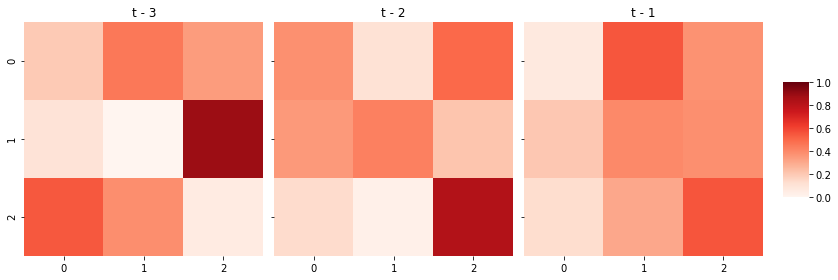

In [20]:
fig, axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(model.transition_matrices[i], ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cmap='Reds',
                cbar_ax=None if i else cbar_ax)
    ax.set_title(f't - {3-i}')

fig.tight_layout(rect=[0, 0, .9, 1]);

## Predict

In [21]:
model.predict(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([1, 2, 2])

In [22]:
model.predict_proba(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([[0.23317049, 0.38547366, 0.38135585],
       [0.18752007, 0.39125173, 0.4212282 ],
       [0.22318062, 0.21948169, 0.55733768]])